In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


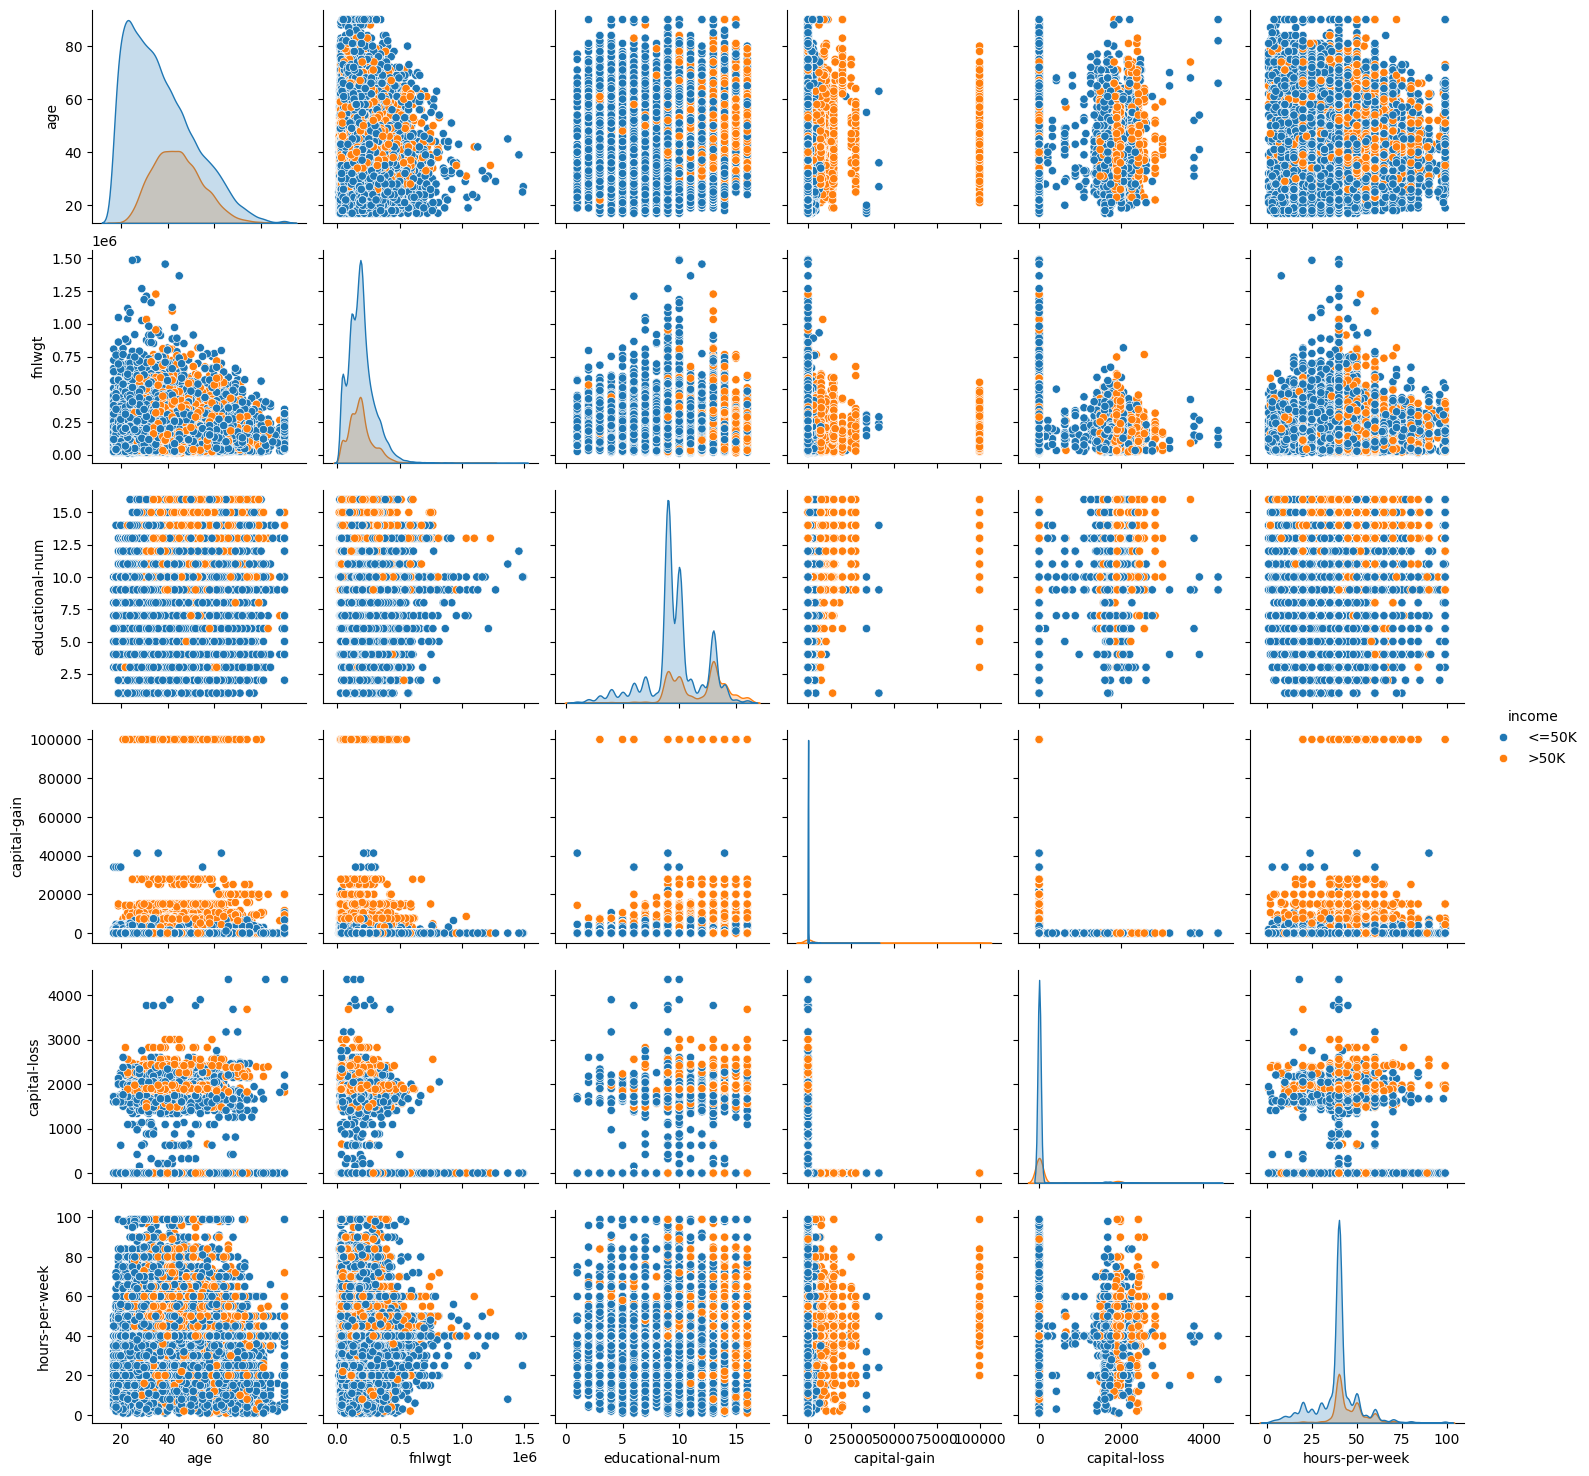

In [4]:
import seaborn as sns

sns.pairplot(df, hue='income')
plt.show()

In [5]:
# display(df['workclass'].value_counts())
# display(df['occupation'].value_counts())
wrk_df = df[(df['workclass'] != '?') & (df['occupation'] != '?')]
df[df['workclass'] == 'Never-worked']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

target_income = le.fit_transform(wrk_df['income'])

# wrk_data = pd.get_dummies(wrk_df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
wrk_data = pd.get_dummies(wrk_df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
wrk_data.drop(['income'], axis=1, inplace=True)

# wrk_data.drop(['capital-loss', 'capital-gain'], axis=1, inplace=True) # чточность модели с этими данными 0.8463

# wrk_data.drop(['fnlwgt'], axis=1, inplace=True) # чточность модели с этими данными 0.8226

display(le.classes_, target_income.shape, target_income)

wrk_data


array(['<=50K', '>50K'], dtype=object)

(46033,)

array([0, 0, 1, ..., 0, 0, 1])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,0,0,30,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,0,0,20,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

wrk_data = scaler.fit_transform(wrk_data)

np.set_printoptions(formatter={'float_kind': '{:f}'.format})
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wrk_data, target_income, test_size=0.2, random_state=42)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(36826, 97)

(36826,)

(9207, 97)

(9207,)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_lr = LogisticRegression()
model_svc = SVC(kernel='poly', degree=3)


In [30]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
model_svc.fit(X_train, y_train)

SVC(kernel='poly')

In [32]:
model_lr.score(X_test, y_test)

0.8466384272835886

In [33]:
model_svc.score(X_test, y_test)

0.8243727598566308

In [88]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
X_r = pca_model.fit_transform(X_test)

In [89]:
pred_vals = model_lr.predict(X_test)

In [90]:
display(X_r.shape, pred_vals.shape, y_test.shape)

(9207, 2)

(9207,)

(9207,)

In [91]:
X_dat = np.column_stack((X_r, y_test, pred_vals))

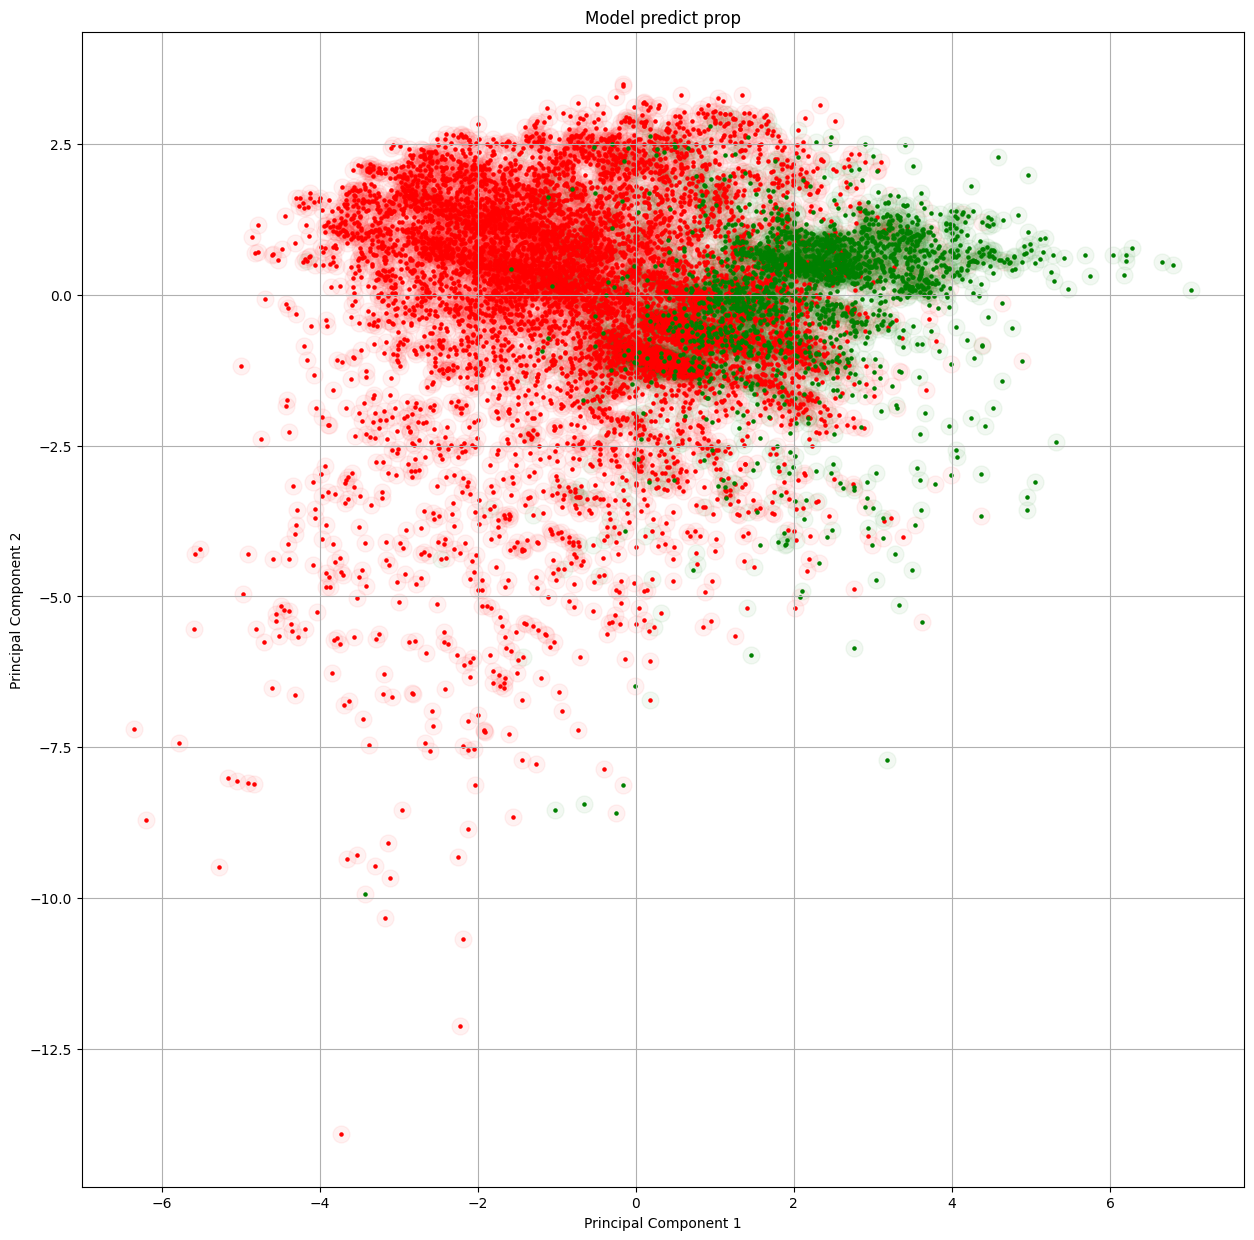

In [92]:
plt.figure(figsize=(15, 15))

# красный кружочек зеленый точечка :)
# кружочек корректный класс
# точечка предсказанный класс
plt.scatter(X_dat[y_test==0, 0], X_dat[y_test==0, 1], marker='o', color='red', alpha=0.05, s=150)
plt.scatter(X_dat[y_test==1, 0], X_dat[y_test==1, 1], marker='o', color='green', alpha=0.05, s=150)

plt.scatter(X_dat[pred_vals==0, 0], X_dat[pred_vals==0, 1], marker='.', color='red', alpha=1, s=20)
plt.scatter(X_dat[pred_vals==1, 0], X_dat[pred_vals==1, 1], marker='.', color='green', alpha=1, s=20)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('Model predict prop')
plt.grid(True)
plt.show()

**выводы:**

1. SVC считается очень долго по сравнению с Lr
2. категориальные признаки транформированы в числовые 0 1
3. удалены пропуски с ?
4. точность моделей одинаковая
5. чтобы улучшить результат, можно еще поработать с исходными данными, например заполнить пропуски а не удалить, привести данные к единому виду? 0-1
